In [25]:
#Importing Necessary packages and dataset
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt 
%matplotlib inline

#Reading the dataset
mnist = fetch_openml('mnist_784')

In [26]:
print(mnist.data.shape) #Getting the number of rows and columns of the dataset

(70000, 784)


In [27]:
#Spliting the dataset into test and train using sklearn package
from sklearn.model_selection import train_test_split
train_img, test_img, train_lbl, test_lbl = train_test_split(
    mnist.data, mnist.target, test_size = 0.3, random_state=0
)

In [28]:
print(train_img.shape)

(49000, 784)


In [29]:
print(train_lbl.shape)

(49000,)


In [30]:
import numpy as np


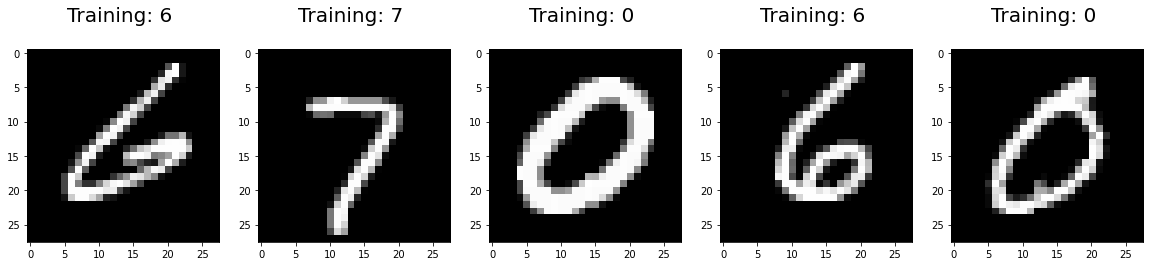

In [31]:
#plotting the train data images using matplotlib
plt.figure(figsize=(20,4))
for index, (images,label) in enumerate(zip(train_img[0:5], train_lbl[0:5])):
  plt.subplot(1,5,index+1)
  plt.imshow(np.reshape(images,(28,28)), cmap = plt.cm.gray)
  plt.title('Training: %s \n' % label, fontsize = 20)


In [32]:
#Importing Logistic Regression Model for training the data
from sklearn.linear_model import LogisticRegression


In [33]:
#Using lbfgs optimizer for the training
logisticRegr = LogisticRegression(solver = 'lbfgs')
logisticRegr.fit(train_img,train_lbl)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
#Predicting test dataset 
logisticRegr.predict(test_img[0].reshape(1,-1))

array(['0'], dtype=object)

In [35]:
logisticRegr.predict(test_img[0:10])

array(['0', '4', '1', '2', '7', '7', '7', '1', '1', '7'], dtype=object)

In [36]:
predictions = logisticRegr.predict(test_img)

In [37]:
#Displaying the accuracy of the trained model
score = logisticRegr.score(test_img, test_lbl)
print(score)

0.9186666666666666


In [38]:
#Creating an array of indexes of misclassified images
index = 0
misclassifiedIndexes = []
for label, predict in zip(test_lbl, predictions):
  if label != predict:
    misclassifiedIndexes.append(index)
  index = index + 1


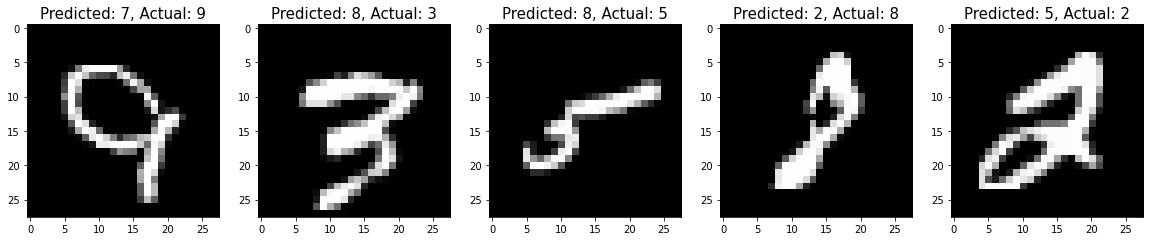

In [39]:
#Plotting the misclassified images
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(test_img[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], test_lbl[badIndex]), fontsize = 15)

In [40]:
#Creating an array of indexes of correctly classified images
index2 = 0
correctclassifiedIndexes = []
for label, predict in zip(test_lbl, predictions):
  if label == predict:
    correctclassifiedIndexes.append(index2)
  index2 = index2 + 1

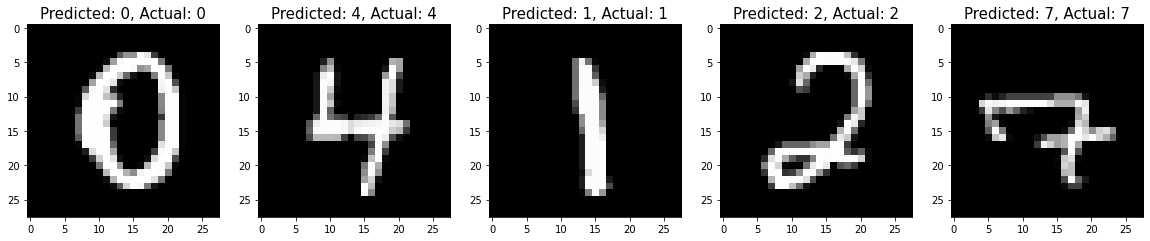

In [41]:
#Plotting the correctly classified images
plt.figure(figsize=(20,4))
for plotIndex, goodIndex in enumerate(correctclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(test_img[goodIndex], (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictions[goodIndex], test_lbl[goodIndex]), fontsize = 15)